# Imports

In [50]:
%load_ext autoreload
%autoreload 2
    
import os
import sys
from typing import List

import numpy as np
from numpy import ndarray

import pandas as pd
from pandas import DataFrame

from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Constants

In [2]:
DATA: str = "data"
DATASET_NAME: str = "2023-10-10-corrosion_inhibition_dataset.csv"

# Paths

In [3]:
# Main Path
main_path: str = os.path.dirname(os.getcwd())

# Place the main path on python path if not already there
if main_path not in sys.path:
    sys.path.insert(0, main_path)

# Data Path
data_path: str = os.path.join(main_path, DATA)

In [4]:
display(main_path)
display(data_path)

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR'

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR\\data'

# Corrosion package imports

In [5]:
%load_ext autoreload
%autoreload 2
    
from corrosion.analysis import Analyzer
from corrosion.enums import MetricType
from corrosion.metrics import Metrics
from corrosion.visuals import CorrosionVisualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [6]:
# Load Data
dataset_path: str = os.path.join(data_path, DATASET_NAME)
data_df: DataFrame = pd.read_csv(dataset_path)

In [7]:
display(data_df)

,ID,Name,SMILES,Inhibitor Efficiency,NEW Inhibitor Efficiency,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,...,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume,PAE,EXP(PAE)
0,sv_0001,4-dimethylaminopyridine,CN(C)c1ccncc1,0.410,1.786009,7.27944,154.081,-5.028120,-1.203830,3.824290,...,4.086290,0.897971,0.826370,-0.43777,0.86,320.77,213.20,125.47,-2.760960,0.063231
1,sv_0002,"2,4,6-trimethylpyridine",Cc1cc(C)nc(C)c1,0.210,1.583658,3.23926,154.901,-5.930990,-1.595940,4.335050,...,5.946280,1.275912,0.339930,-0.53166,1.53,377.25,226.40,129.42,-2.594520,0.074682
2,sv_0003,"2,6-dimethylpyridine",Cc1cccc(C)n1,0.133,1.421263,2.43685,133.929,-5.954120,-1.727920,4.226200,...,5.313278,1.367623,0.592116,-0.52254,1.02,333.29,193.75,112.59,-2.558530,0.077418
3,sv_0004,4-methoxypyridine,COc1ccncc1,0.144,1.450566,4.87253,120.146,-6.080650,-1.495530,4.585120,...,4.997971,1.135525,0.573002,-0.51915,0.60,303.97,175.61,104.87,-2.296413,0.100619
4,sv_0005,4-methylpyridine,Cc1ccncc1,0.119,1.379620,4.25173,112.687,-6.090990,-1.709690,4.381300,...,5.447009,1.322235,0.512755,-0.50277,1.27,281.77,160.71,95.83,-2.563799,0.077012
5,sv_0006,2-methylpyridine,Cc1ccccn1,0.091,1.276551,2.97610,112.872,-6.033850,-1.788060,4.245790,...,5.481084,1.404642,0.546940,-0.50541,0.89,287.88,160.86,95.80,-2.545336,0.078447
6,sv_0007,4-benzylpyridine,C(c1ccccc1)c2ccncc2,0.552,1.857005,3.89687,218.452,-6.007730,-1.861800,4.145930,...,5.576863,1.617523,0.640145,-0.49828,2.85,370.87,266.73,168.01,-2.725550,0.065510
7,sv_0008,3-methylpyridine,Cc1cccnc1,0.068,1.161168,3.87215,112.299,-6.048270,-1.809010,4.239260,...,5.922274,1.428574,0.408593,-0.49082,1.27,281.53,160.78,95.83,-2.545682,0.078420
8,sv_0010,pyridine,c1ccncc1,0.059,1.103902,3.42526,91.744,-6.119570,-1.852000,4.267570,...,5.668172,1.446886,0.500665,-0.49220,0.76,245.64,128.00,79.01,-2.539789,0.078883
9,sv_0012,3-hydroxypyridine,Oc1cccnc1,0.103,1.324570,5.33041,101.749,-5.842830,-1.831050,4.011780,...,5.333721,1.437248,0.629006,-0.47873,0.45,250.21,139.10,87.28,-2.510191,0.081253


# Data Analysis

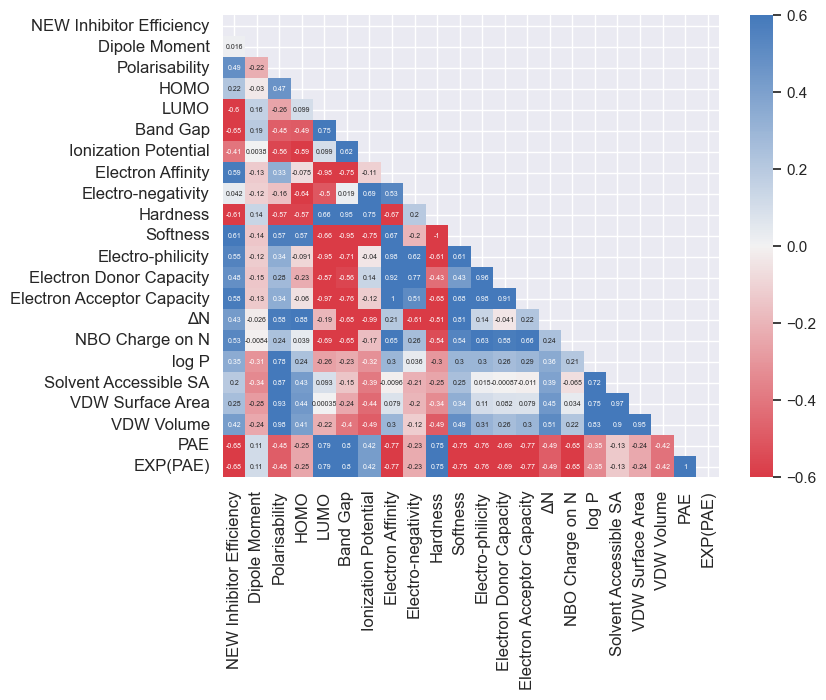

In [34]:
# Get the correlation matrix
correlation_df = data_df.iloc[:, 4:].corr(method='spearman')  # 4 from the data (first three are labels)
CorrosionVisualizer.correlation_heatmap(correlation_df)

In [60]:
# Get X
_x_df: DataFrame = data_df.iloc[:, 3:].drop(
    columns=["PAE", "EXP(PAE)", "Inhibitor Efficiency", "NEW Inhibitor Efficiency"],
    errors="ignore"
)
_x: ndarray = _x_df.values
_x_labels: List[str] = list(_x_df.columns)

# Number of compounds & features
m: int
n: int
m, n = _x.shape

# Get Y
_ys_df: DataFrame = data_df[["PAE", "Inhibitor Efficiency"]]
_y_theoretical: ndarray = data_df["PAE"]
_y_experimenmmtal: ndarray = data_df["Inhibitor Efficiency"]

In [62]:
display(_x_df.head())

,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,Ionization Potential,Electron Affinity,Electro-negativity,Hardness,Softness,Electro-philicity,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume
0,7.27944,154.081,-5.02812,-1.20383,3.82429,5.494600,0.882037,3.188319,2.306281,0.433598,2.203845,4.086290,0.897971,0.826370,-0.43777,0.86,320.77,213.20,125.47
1,3.23926,154.901,-5.93099,-1.59594,4.33505,8.096999,1.243737,4.670368,3.426631,0.291832,3.182767,5.946280,1.275912,0.339930,-0.53166,1.53,377.25,226.40,129.42
2,2.43685,133.929,-5.95412,-1.72792,4.22620,6.524833,1.366477,3.945655,2.579178,0.387720,3.018053,5.313278,1.367623,0.592116,-0.52254,1.02,333.29,193.75,112.59
3,4.87253,120.146,-6.08065,-1.49553,4.58512,6.600265,1.124627,3.862446,2.737819,0.365254,2.724521,4.997971,1.135525,0.573002,-0.51915,0.60,303.97,175.61,104.87
4,4.25173,112.687,-6.09099,-1.70969,4.38130,6.928478,1.321071,4.124774,2.803703,0.356671,3.034159,5.447009,1.322235,0.512755,-0.50277,1.27,281.77,160.71,95.83


In [63]:
display(_ys_df.head())

,PAE,Inhibitor Efficiency
0,-2.760960,0.410
1,-2.594520,0.210
2,-2.558530,0.133
3,-2.296413,0.144
4,-2.563799,0.119


# Approaches

1. PCA Analysis to determine which features are relevant?
2. Predict only the computational adsorption energy
3. Co-train the computational & experimental adsorption energies
4. Use both linear and non-linear models (ANN? RFs?)
5. General approach:
   - Train/Test Split (Holdout set)
   - Cross-validation
   - Grid search to optimize the hyper-parameters
   - Validate by analysing the metrics, applicability domain
   - Stack of multiple regressors?

# PCA Analysis

In [64]:
_initial_n_pcs: int = 15

In [65]:
_pca: PCA = PCA(n_components=_initial_n_pcs)

In [66]:
_pca.fit(_x)

PCA(n_components=15)

In [67]:
explained_variance_df: DataFrame = pd.DataFrame(
    [np.array(range(1, _initial_n_pcs + 1), dtype=int), np.cumsum(_pca.explained_variance_ratio_)]
).T
explained_variance_df.columns = ["n(PCs)", "%Explained Variance"]

In [68]:
display(explained_variance_df)

,n(PCs),%Explained Variance
0,1.0,0.935883
1,2.0,0.990263
2,3.0,0.998266
3,4.0,0.999305
4,5.0,0.999654
5,6.0,0.999886
6,7.0,0.999971
7,8.0,0.999994
8,9.0,0.999999
9,10.0,1.000000


In [69]:
_optimal_n_pcs: int = Analyzer.get_optimal_n_pcs(
    explained_variance_df=explained_variance_df,
    threshold=0.001,
    explained_variance_label="%Explained Variance"
)

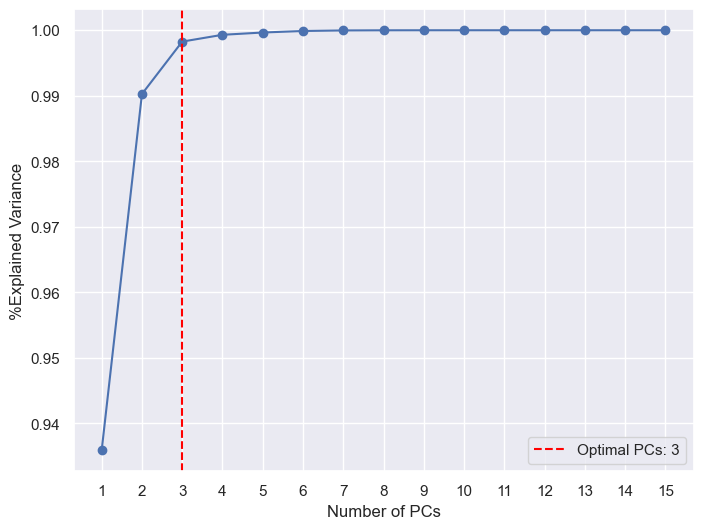

In [80]:
CorrosionVisualizer.percentage_of_explained_variance_plot(
    explained_variance_df=explained_variance_df,
    n_components=_optimal_n_pcs
)

In [81]:
# Refit the model with optimal number of components
_pca_optimal: PCA = PCA(n_components=_optimal_n_pcs)
_pca_optimal.fit(_x)

# Reconstruct the data using the PCA model
_x_pcs = _pca_optimal.transform(_x)
_x_reconstructed = _pca_optimal.inverse_transform(_x_pcs)

In [94]:
# Calculate MSEs
_mses: ndarray = [
    Metrics.get_metric(
        y=_x[:, _i],
        y_hat=_x_reconstructed[:, _i],
        metric_type=MetricType.MSE
    ) for _i in range(n)
]

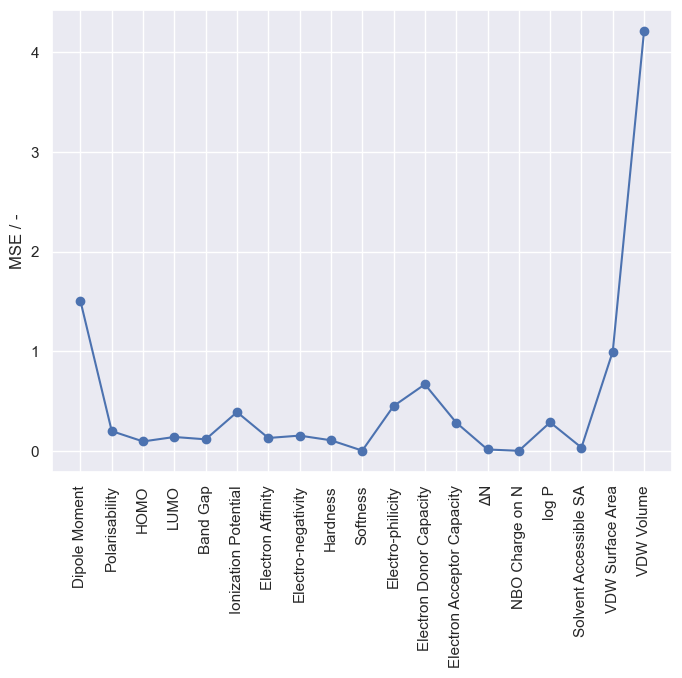

In [95]:
CorrosionVisualizer.mse_plot(
    feature_labels=_x_labels,
    mses=_mses
)

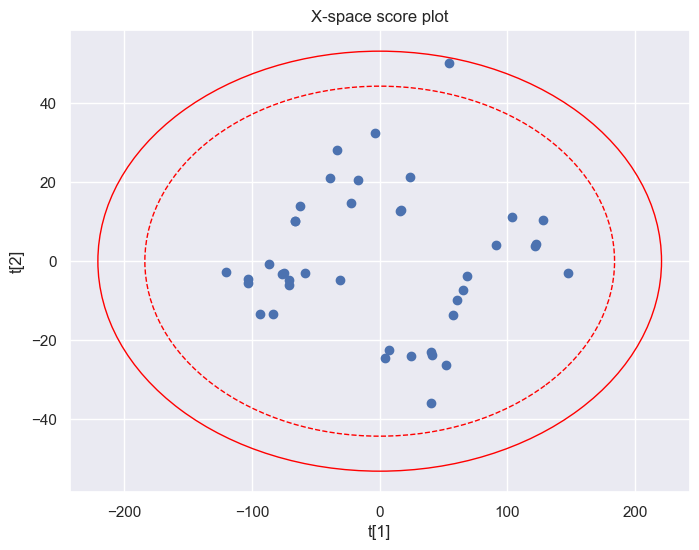

In [93]:
from matplotlib import pyplot as plt
fig, ax = CorrosionVisualizer.score_plot(
    scores=_x_pcs[:, :2],
    figsize=(8, 6)
)
plt.show()

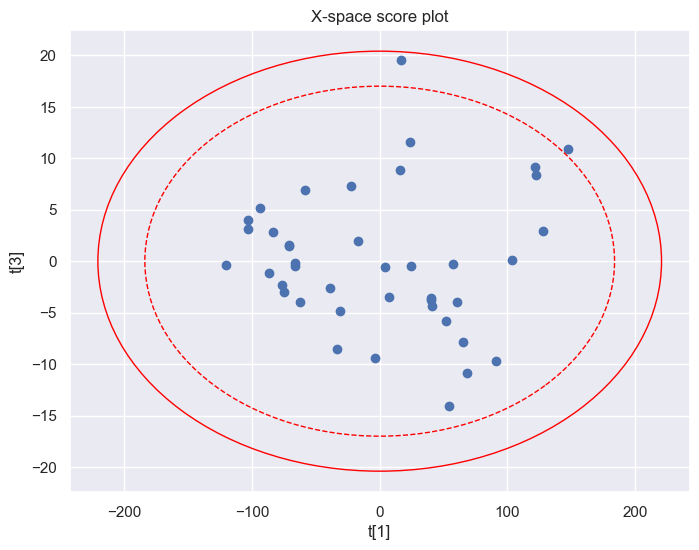

In [102]:
fig, ax = CorrosionVisualizer.score_plot(
    scores=np.hstack((_x_pcs[:, 0].reshape(-1, 1), _x_pcs[:, 2].reshape(-1, 1))),
    figsize=(8, 6),
    x_label="1",
    y_label="3"
)
plt.show()